# Dinamika regulacije ekspresije gena

### **1. Izvedite izraze za statističke težine konfiguracija koje su označene pored svake na slici, a zatim i za transkripcione aktivnosti promotora $\phi_{CR}$ i $\phi_M$.**

Za $\phi_{CR}$ promotor:

\begin{equation}
    Z_1 = 1
\end{equation}

\begin{equation}
    Z_2 = \frac{[RNAP]}{K} \
    e^{- \Delta G_{RNAP}}
\end{equation}

\begin{equation}
    Z_3 = \frac{[C]^2[RNAP]}{K^3} \
    e^{- \Delta G_{RNAP} - \Delta G_{DBS} - \Delta G_D - \Delta G_{D-RNAP}}
\end{equation}

\begin{equation}
    Z_4 = \frac{[C]^4}{K^4} \
    e^{- \Delta G_{DBS} - \Delta G_{PBS} - 2 \Delta G_D - \Delta G_r}
\end{equation}

\begin{equation}
    \phi_{CR} = \alpha \frac{Z_2 + Z_3}{1 + Z_2 + Z_3 + Z_4} \Rightarrow \
    \phi_{CR} = \alpha \frac{a + b [C]^2}{1 + a + b [C]^2 + c [C]^4}
\end{equation}

Za $\phi_M$ promotor:

\begin{equation}
    Z_1' = 1
\end{equation}

\begin{equation}
    Z_2' = \frac{[RNAP]}{K} e^{-\Delta G_{RNAP}}
\end{equation}

\begin{equation}
    Z_3' = \frac{[M]}{K} e^{-\Delta G_M}
\end{equation}

\begin{equation}
    \phi_M = \phi_{MB} \frac{Z_2'}{1 + Z_2' + Z_3'} \Rightarrow \
    \phi_M = \phi_{MB} \frac{K_D}{K_D + [M]}
\end{equation}

### **2. Napišite diferencijalne jednačine koje opisuju promene koncentracija transkripta cr operona (cr), transkripta m gena (m), C proteina (C) i metiltransferaze (M) sa vremenom.**

\begin{equation}
    \frac{dcr}{dt} = \phi(C) - \lambda_{cr}cr
\end{equation}

\begin{equation}
    \frac{dC}{dt} = k_C cr - \lambda_C C
\end{equation}

\begin{equation}
    \frac{dm}{dt} = \phi(M) - \lambda_m m
\end{equation}

\begin{equation}
    \frac{dM}{dt} = k_M m - \lambda_M M
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definisanje parametara
lambda_cr = 0.2
lambda_m  = 0.2

lambda_C = 1/30
lambda_M = 1/30

kC = 0.6
kM = 3.0
kR = 3.0

ratio_R_to_C = kR / kC

# Intenzitet transkripcije CR
alpha = 1.663
a = 0.16
b = 0.148
c = 1.21e-5

def phi_cr(C):
    return alpha * (a + b*C**2) / (1 + a + b*C**2 + c*C**4)

# Intenzitet transkripcije M
phi_MB = 1.6923
KD = 650 

def phi_m(M):
    return phi_MB * (KD / (KD + M))

# Vreme
dt = 0.01
t_end = 120.0
t = np.arange(0.0, t_end + dt, dt)

# Pocetni uslovi
cr0 = 0.0
C0 = 0.0
m0 = 0.0
M0 = 0.0

cr = np.zeros_like(t)
C = np.zeros_like(t)
m = np.zeros_like(t)
M = np.zeros_like(t)
R = np.zeros_like(t)

cr[0], C[0], m[0], M[0] = cr0, C0, m0, M0
R[0] = ratio_R_to_C * C0

In [3]:
# Izracunavanje
for i in range(len(t) - 1):
    cr_i, C_i, m_i, M_i = cr[i], C[i], m[i], M[i]

    dcr_dt = phi_cr(C_i) - lambda_cr * cr_i
    dC_dt = kC * cr_i - lambda_C * C_i

    dm_dt = phi_m(M_i) - lambda_m * m_i
    dM_dt = kM * m_i - lambda_M * M_i

    cr_next = cr_i + dt * dcr_dt
    C_next = C_i + dt * dC_dt
    m_next = m_i + dt * dm_dt
    M_next = M_i + dt * dM_dt

    cr[i+1], C[i+1], m[i+1], M[i+1] = cr_next, C_next, m_next, M_next
    R[i+1] = ratio_R_to_C * C_next

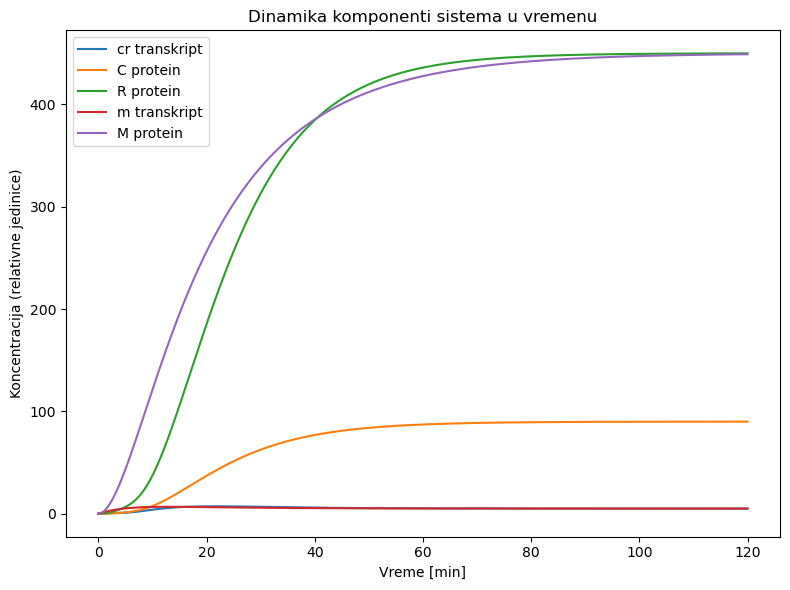

In [4]:
# Grafik
plt.figure(figsize=(8,6))
plt.plot(t, cr, label="cr transkript")
plt.plot(t, C, label="C protein")
plt.plot(t, R, label="R protein")
plt.plot(t, m, label="m transkript")
plt.plot(t, M, label="M protein")
plt.xlabel("Vreme [min]")
plt.ylabel("Koncentracija (relativne jedinice)")
plt.title("Dinamika komponenti sistema u vremenu")
plt.legend()
plt.tight_layout()
plt.show()

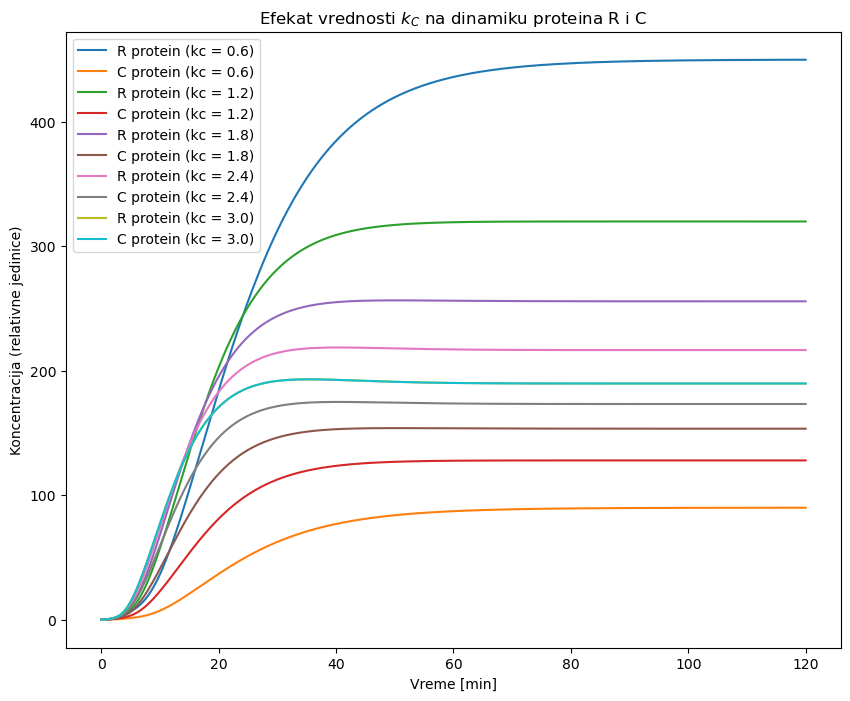

In [5]:
# Promena vrednosti kC (C i R proteini)

kC_values = [0.6, 1.2, 1.8, 2.4, 3.0]

dt = 0.1 # zarad performansi
t_end = 120.0
t = np.arange(0.0, t_end + dt, dt)

plt.figure(figsize=(10,8))

for kC in kC_values:
    ratio_R_to_C = kR / kC

    cr = np.zeros_like(t)
    C = np.zeros_like(t)
    R = np.zeros_like(t)

    cr[0], C[0] = cr0, C0
    R[0] = ratio_R_to_C * C0

    for i in range(len(t) - 1):
        cr_i, C_i = cr[i], C[i]

        dcr_dt = phi_cr(C_i) - lambda_cr * cr_i
        dC_dt = kC * cr_i - lambda_C * C_i

        cr_next = cr_i + dt * dcr_dt
        C_next = C_i  + dt * dC_dt

        cr[i+1], C[i+1] = cr_next, C_next
        R[i+1] = ratio_R_to_C * C_next

    plt.plot(t, R, label=f"R protein (kc = {kC})")
    plt.plot(t, C, label=f"C protein (kc = {kC})")

plt.xlabel("Vreme [min]")
plt.ylabel("Koncentracija (relativne jedinice)")
plt.title(f"Efekat vrednosti $k_C$ na dinamiku proteina R i C")
plt.legend()
plt.show()

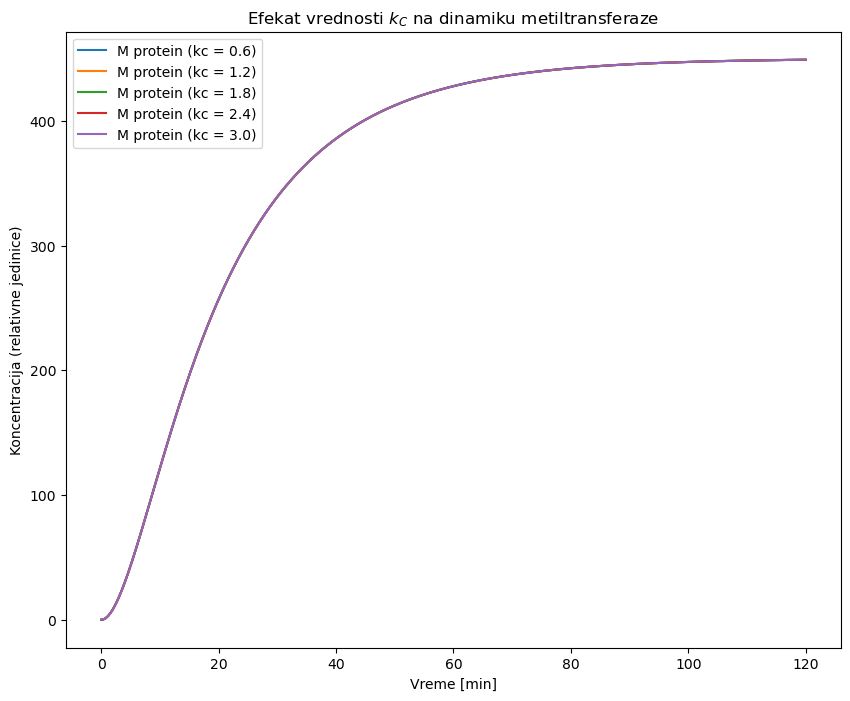

In [6]:
# Efekat na M protein
plt.figure(figsize=(10,8))

for kC in kC_values:
    m = np.zeros_like(t)
    M = np.zeros_like(t)

    m[0], M[0] = m0, M0

    for i in range(len(t) - 1):
        m_i, M_i = m[i], M[i]

        dm_dt = phi_m(M_i) - lambda_m * m_i
        dM_dt = kM * m_i - lambda_M * M_i

        m_next = m_i + dt * dm_dt
        M_next = M_i + dt * dM_dt

        m[i+1], M[i+1] = m_next, M_next

    plt.plot(t, M, label=f"M protein (kc = {kC})")

plt.xlabel("Vreme [min]")
plt.ylabel("Koncentracija (relativne jedinice)")
plt.title(f"Efekat vrednosti $k_C$ na dinamiku metiltransferaze")
plt.legend()
plt.show()

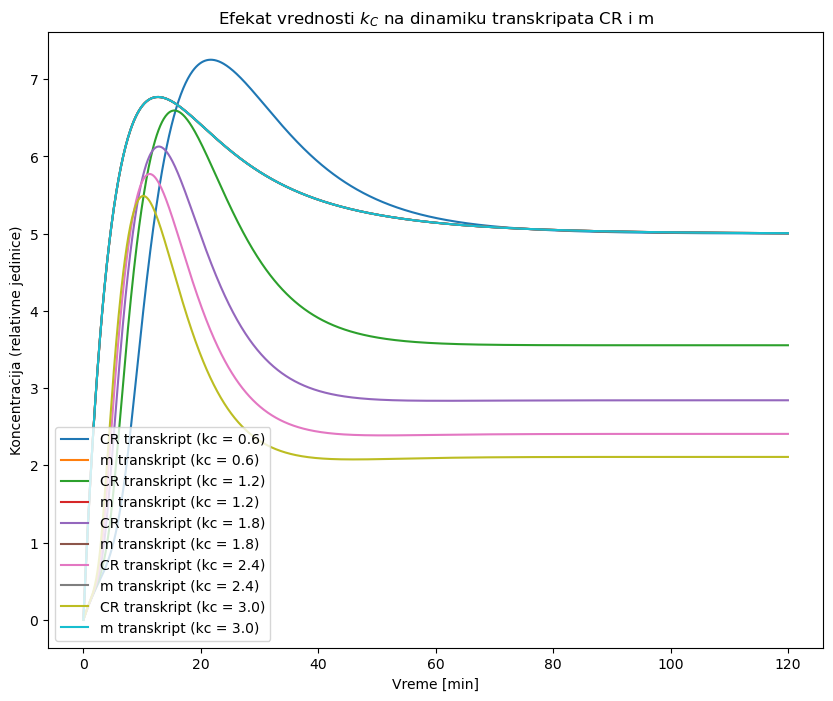

In [7]:
# Efekat na transkripte
plt.figure(figsize=(10,8))

for kC in kC_values:
    cr = np.zeros_like(t)
    C = np.zeros_like(t)
    m = np.zeros_like(t)
    M = np.zeros_like(t)

    cr[0], C[0], m[0], M[0] = cr0, C0, m0, M0

    for i in range(len(t) - 1):
        cr_i, C_i, m_i, M_i = cr[i], C[i], m[i], M[i]

        dcr_dt = phi_cr(C_i) - lambda_cr * cr_i
        dC_dt = kC * cr_i - lambda_C * C_i

        dm_dt = phi_m(M_i) - lambda_m * m_i
        dM_dt = kM * m_i - lambda_M * M_i

        cr_next = cr_i + dt * dcr_dt
        C_next = C_i + dt * dC_dt
        m_next = m_i + dt * dm_dt
        M_next = M_i + dt * dM_dt

        cr[i+1], C[i+1], m[i+1], M[i+1] = cr_next, C_next, m_next, M_next

    plt.plot(t, cr, label=f"CR transkript (kc = {kC})")
    plt.plot(t, m, label=f"m transkript (kc = {kC})")

plt.xlabel("Vreme [min]")
plt.ylabel("Koncentracija (relativne jedinice)")
plt.title(f"Efekat vrednosti $k_C$ na dinamiku transkripata CR i m")
plt.legend()
plt.show()

### **1. Kako perturbacija parametra $k_C$ utiče na osobine dinamike ekspresije sistema?**

Vidi se da $k_C$ uopšte nema uticaja na vrednost transkripta m, a samim tim ne utiče ni na koncentraciju M proteina. Sa rastućom vrednošću $k_C$, opada količina CR transkripta, što je u skladu sa porastom količine C proteina. Istovremeno, smanjuje se koncentracija R proteina. Osim toga, više vrednosti $k_C$ podrazumevaju brže uspostavljanje stacionarnog stanja za sve komponente sistema.

**Napomena**: krive su podeljene na tri različita grafika za razliku od uputstva u knjizi koje traži da se priloži grafik sa svim nacrtanim krivama, isključivo zbog lakše vizuelizacije u ovom notebook-u. Naravno, sasvim je moguće uneti sve komande u jednu petlju i menjati izlaz grafika označavanjem određenih komandi kao komentara. 

### **2. Koji elementi regulacije AhdI sistema doprinose kašnjenju u ekspresiji restrikcione endonukleaze, a koji brzom prelasku njene ekspresije iz isključenog u uključeno stanje?**

Kada je u pitanju kašnjenje sinteze endonukleaze u odnosu na metiltransferazu, ona se dešava zbog spore translacije C transkripta - C protein je neophodan za aktivaciju ekspresije R proteina. Brz prelazak iz isključenog u uključeno stanje dešava se zbog visoke kooperativnosti u vezivanju C proteina za DNK, koja doprinosi brzoj aktivaciji ekspresije R proteina, ali ne pre nego što se sintetiše znatna količina metiltransferaze. Biološki značaj se ogleda u tome da metiltransferaza mora da ima dovoljno vremena da zaštiti bakterijski genom od delovanja endonukleaze.